# Dependencies

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

# Climate Analysis and Exploration

In [2]:
# Use SQLAlchemy create_engine to connect to your sqlite database.

engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [3]:
from sqlalchemy.orm import Session

session = Session(bind=engine)

In [4]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [5]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [6]:
# Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.

engine.execute('Select * From measurement Limit 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [7]:
engine.execute("Select * From measurement Where date = '2011-09-09'").fetchall()

[(564, 'USC00519397', '2011-09-09', 0.0, 79.0),
 (5918, 'USC00514830', '2011-09-09', None, 76.0),
 (7922, 'USC00517948', '2011-09-09', 0.0, 77.0),
 (9348, 'USC00518838', '2011-09-09', 0.0, 73.0),
 (10129, 'USC00519523', '2011-09-09', 0.0, 78.0),
 (12799, 'USC00519281', '2011-09-09', 0.0, 71.0),
 (15559, 'USC00511918', '2011-09-09', 0.0, 68.0),
 (17531, 'USC00516128', '2011-09-09', 0.09, 75.0)]

In [8]:
# Use SQLAlchemy automap_base() to reflect your tables into classes and save a reference to those classes called Station and Measurement.

from sqlalchemy.ext.automap import automap_base

Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
results = session.query(Measurement.tobs).all()

values_tobs = list(np.ravel(results))
values_tobs

[65.0,
 63.0,
 74.0,
 76.0,
 73.0,
 70.0,
 64.0,
 68.0,
 73.0,
 64.0,
 61.0,
 66.0,
 65.0,
 68.0,
 64.0,
 72.0,
 66.0,
 66.0,
 69.0,
 67.0,
 67.0,
 71.0,
 67.0,
 76.0,
 68.0,
 72.0,
 70.0,
 67.0,
 66.0,
 67.0,
 69.0,
 67.0,
 67.0,
 64.0,
 69.0,
 73.0,
 73.0,
 69.0,
 69.0,
 69.0,
 71.0,
 61.0,
 69.0,
 63.0,
 64.0,
 65.0,
 67.0,
 68.0,
 65.0,
 76.0,
 75.0,
 66.0,
 70.0,
 72.0,
 73.0,
 70.0,
 71.0,
 72.0,
 72.0,
 69.0,
 70.0,
 73.0,
 72.0,
 73.0,
 70.0,
 71.0,
 68.0,
 70.0,
 72.0,
 69.0,
 68.0,
 74.0,
 72.0,
 72.0,
 73.0,
 74.0,
 73.0,
 73.0,
 74.0,
 74.0,
 74.0,
 71.0,
 72.0,
 75.0,
 75.0,
 75.0,
 75.0,
 73.0,
 73.0,
 71.0,
 71.0,
 68.0,
 70.0,
 71.0,
 74.0,
 71.0,
 75.0,
 76.0,
 75.0,
 75.0,
 76.0,
 76.0,
 76.0,
 77.0,
 77.0,
 73.0,
 74.0,
 76.0,
 76.0,
 80.0,
 74.0,
 77.0,
 77.0,
 76.0,
 77.0,
 78.0,
 78.0,
 75.0,
 73.0,
 77.0,
 76.0,
 77.0,
 77.0,
 78.0,
 75.0,
 77.0,
 77.0,
 77.0,
 76.0,
 75.0,
 77.0,
 77.0,
 77.0,
 78.0,
 76.0,
 78.0,
 76.0,
 77.0,
 78.0,
 77.0,
 78.0,
 78.0,
 79.0,

# Precipitation Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data.

recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(recent_date)

('2017-08-23',)


In [11]:
previous_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(previous_year)

2016-08-23


In [12]:
#perform a query to retrieve the data and prcp values
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > previous_year).\
    order_by(Measurement.date).all()

In [13]:
# Load the query results into a Pandas DataFrame and set the index to the date column.
precipitation_data_df = pd.DataFrame(precipitation_data)
precipitation_data_df

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
...,...,...
2218,2017-08-22,0.50
2219,2017-08-23,0.00
2220,2017-08-23,0.00
2221,2017-08-23,0.08


In [14]:
precipitation_data_df = precipitation_data_df.set_index('date')
precipitation_data_df

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


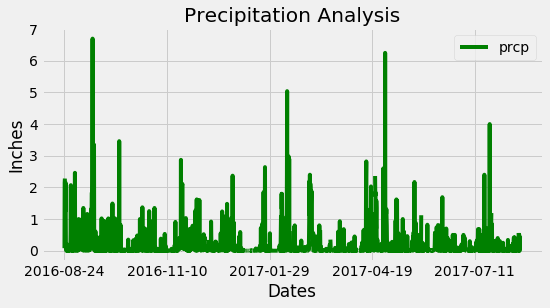

In [15]:
# Plot the results using the DataFrame plot method.

ax = precipitation_data_df.plot(color="green", figsize=(8,4))
ax.set_title("Precipitation Analysis")
ax.set_xlabel('Dates')
ax.set_ylabel('Inches')
plt.show()

In [16]:
#Use Pandas to print the summary statistics for the precipitation data.

precipitation_data_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

In [17]:
from sqlalchemy import func

#Design a query to calculate the total number of stations.

stations_total = session.query(func.count(Station.station)).first()
print(f"Total number of stations: {str(stations_total[0])}")

Total number of stations: 9


In [18]:
engine.execute("Select count(station), station From measurement Group By station Order By count(station) DESC").fetchall()

[(2772, 'USC00519281'),
 (2724, 'USC00519397'),
 (2709, 'USC00513117'),
 (2669, 'USC00519523'),
 (2612, 'USC00516128'),
 (2202, 'USC00514830'),
 (1979, 'USC00511918'),
 (1372, 'USC00517948'),
 (511, 'USC00518838')]

In [19]:
#List the stations and observation counts in descending order.

active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
        group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

In [20]:
active_stations_df = pd.DataFrame(data=active_stations, columns=['Station', 'Count'])
active_stations_df.head()

,Station,Count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612


In [21]:
#Which station has the highest number of observations?

station_with_the_most_observations = active_stations_df["Station"][0]
most_observations = active_stations_df["Count"][0]

print(f"Station with the most observations ({most_observations}): {station_with_the_most_observations}")

Station with the most observations (2772): USC00519281


In [22]:
#Filter by the station with the highest number of observations.

temps_frequencies = session.query(Measurement.tobs).\
    filter(Measurement.date >= '2016-08-24').\
    filter(Measurement.station == station_with_the_most_observations).\
    order_by(Measurement.tobs).all()
temps_frequencies

[(59.0),
 (59.0),
 (59.0),
 (60.0),
 (60.0),
 (61.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (63.0),
 (63.0),
 (63.0),
 (63.0),
 (64.0),
 (64.0),
 (64.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (66.0),
 (66.0),
 (66.0),
 (66.0),
 (66.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 

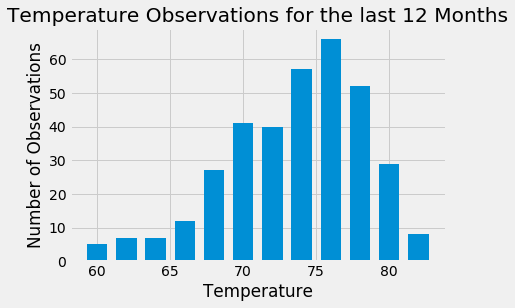

In [23]:
#Plot the results as a histogram with bins=12.

plt.title("Temperature Observations for the last 12 Months")
plt.xlabel("Temperature")
plt.ylabel("Number of Observations")

x = temps_frequencies
hist, bins = np.histogram(x, bins=12)
width =  0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()